In [1]:
import logging
import os
import sys
from os import path
from pathlib import Path

from kornia.augmentation import ImageSequential
import  matplotlib.pyplot as plt
import pandas as pd

import hydra
import pytest
import torch
from dotenv import find_dotenv, load_dotenv
from omegaconf import OmegaConf
import kornia

from PIL import Image
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torchvision import transforms

In [2]:
aug_list = ImageSequential(
        #     kornia.color.BgrToRgb(),
        kornia.augmentation.ColorJitter(0.2, 0.0, 0.0, 0.0, p=1.0),
        #     kornia.filters.MedianBlur((3, 3)),
        kornia.augmentation.RandomAffine(360, p=1.0),
        #     kornia.augmentation.RandomGaussianNoise(mean=0., std=1., p=0.5),
        kornia.augmentation.RandomPerspective(0.1, p=0.8),
        kornia.augmentation.RandomHorizontalFlip(p=0.5)
        #     kornia.enhance.Invert(),
        #     kornia.augmentation.RandomMixUp(p=1.0),
        #     return_transform=True,
        #     same_on_batch=True
        #     random_apply=10
    )

In [8]:
im = Image.open(r"C:\\Users\\mailt\\OneDrive\\Dokumenter\\GitHub\\mlops_fuzzy-fish-waffle\\data\\raw\\Black Sea Sprat\\00001.png") 
convert_tensor = transforms.ToTensor()

torch.Size([10, 3, 768, 1024])

In [38]:
test = aug_list(convert_tensor(im).unsqueeze(0).repeat(10,1,1,1))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  .

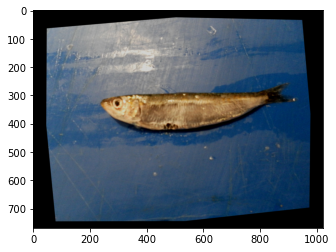

In [46]:
for i in range(10):
                image = test[i].numpy().transpose((1, 2, 0))
                plt.imshow(image)